# Predicting Condition Flare Up in Patients with Respiratory Disease History

In [1]:
import pandas as pd                         # pandas is a dataframe library
import matplotlib.pyplot as plt             # matplotlib.pyplot plots data
import numpy as np                          # numpy provides N-dim object support

# do ploting inpline instead of in a separate window
%matplotlib inline

df = pd.read_csv(r'training_data.csv') # load the development data
df_score = pd.read_csv(r'scoring_data.csv')
feature_col_names = ['Demo1','Demo2','Demo3','Demo4','Demo5','Demo6','DisHis1','DisHis1Times','DisHis2','DisHis2Times','DisHis3','DisHis3Times','DisHis4','DisHis5','DisHis6','DisHis7','DisStage1','DisStage2','LungFun1','LungFun10','LungFun11','LungFun12','LungFun13','LungFun14','LungFun15','LungFun16','LungFun17','LungFun18','LungFun19','LungFun2','LungFun20','LungFun3','LungFun4','LungFun5','LungFun6','LungFun7','LungFun8','LungFun9','Dis1','Dis1Treat','Dis2','Dis2Times','Dis3','Dis3Times','Dis4','Dis4Treat','Dis5','Dis5Treat','Dis6','Dis6Treat','Dis7','RespQues1','ResQues1a','ResQues1b','ResQues1c','ResQues2a','SmokHis1','SmokHis2','SmokHis3','SmokHis4']
['DisHis1', 'DisHis1Times', 'DisHis2', 'DisHis2Times', 'DisHis3', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'DisStage2', 'LungFun1', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun3', 'LungFun4', 'LungFun7', 'LungFun8', 'LungFun9', 'Dis1Treat', 'Dis2Times', 'Dis3Times', 'Dis4Treat', 'Dis5Treat', 'Dis6Treat', 'RespQues1', 'ResQues1a', 'ResQues1b', 'ResQues1c', 'ResQues2a']

# Feature selection by using F_scores or regression_f or f_classif
feature_selected_names = ['DisHis1', 'DisHis1Times', 'DisHis2', 'DisHis2Times', 'DisHis3', 'DisHis3Times', 'DisHis4', 'DisHis5', 'DisHis6', 'DisHis7', 'DisStage1', 'DisStage2', 'LungFun1', 'LungFun12', 'LungFun13', 'LungFun14', 'LungFun3', 'LungFun4', 'LungFun7', 'LungFun8', 'LungFun9', 'Dis1Treat', 'Dis2Times', 'Dis3Times', 'Dis4Treat', 'Dis5Treat', 'Dis6Treat', 'RespQues1', 'ResQues1a', 'ResQues1b', 'ResQues1c', 'ResQues2a']

predicated_class_name = ['Flare_Up']

data = df[feature_selected_names].values                # predicator feature columns (60 x m)
target = df[predicated_class_name].values

score_data = df_score[feature_selected_names].values 

X, y, Z = data, target, score_data

X.shape 


(1687, 32)

In [2]:
Z.shape #score data

(298, 32)

#### Splitting the Training & Testing data

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train.shape


(1349, 32)

## Linear Regression

Text(0,0.5,'Predictions')

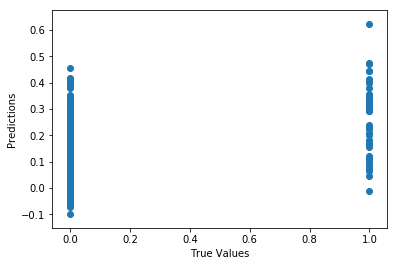

In [4]:
from sklearn import linear_model
from sklearn import metrics

# fit a model
model = linear_model.LinearRegression()
model.fit(X, y.ravel())
predict_test = model.predict(X_test)
predict_train = model.predict(X_train)

## The line / model
plt.scatter(y_test, predict_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")


In [5]:
# The mean square error
np.mean((predict_test-y_test)**2)
print("Mean: {0:.4f}".format(np.mean((predict_test-y_test)**2)))

Mean: 0.1247


In [6]:
#score

print("Score: {0:.4f}".format(model.score(X_test, y_test)))

Score: 0.1582


### Naive Bayes - GaussianNB [NB]

#http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Text(0,0.5,'Predictions')

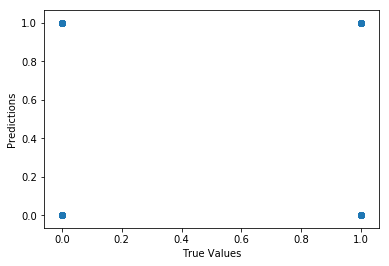

In [7]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X, y.ravel())
GaussianNB(priors=None)
nb_predict_test = nb_model.predict(X_test)

## The line / model
plt.scatter(y_test, nb_predict_test)
plt.xlabel("True Values")
plt.ylabel("Predictions")

Text(0,0.5,'Predictions')

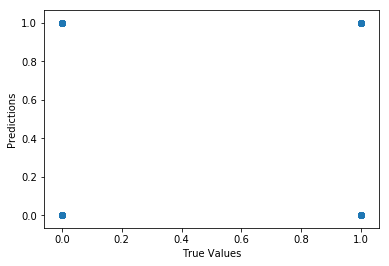

In [8]:
nb_predict_train = nb_model.predict(X_train)
plt.scatter(y_train, nb_predict_train)
plt.xlabel("True Values")
plt.ylabel("Predictions")

#### Performance of Testing & Training data for Naive Bayes

In [9]:
from sklearn import metrics

#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7604


In [10]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7317


#### Confusion & Classification matrix for NB

In [11]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, nb_predict_test)))


Confusion matrix
[[231  65]
 [ 16  26]]
Classification Report
             precision    recall  f1-score   support

          0       0.94      0.78      0.85       296
          1       0.29      0.62      0.39        42

avg / total       0.85      0.76      0.79       338



## Random Forest [RF]

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [13]:
rf_predict_train = rf_model.predict(X_train)
rf_predict_test = rf_model.predict(X_test)

#### Performance of Testing & Training data for RF

In [14]:
from sklearn import metrics

#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.8728


In [15]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9837


#### Matrix

In [16]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, rf_predict_test)))

Confusion matrix
[[291   5]
 [ 38   4]]
Classification Report
             precision    recall  f1-score   support

          0       0.88      0.98      0.93       296
          1       0.44      0.10      0.16        42

avg / total       0.83      0.87      0.83       338



## LogisticRegression[LR] - [Selected]

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
from sklearn.linear_model import LogisticRegression
best_score_c_val = 0.3
lr_model = LogisticRegression(C=best_score_c_val, class_weight="balanced", random_state=42)
lr_model.fit(X_train, y_train.ravel())

LogisticRegression(C=0.3, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
lr_predict_train = lr_model.predict(X_train)
lr_predict_test = lr_model.predict(X_test)

#### Performance of Testing & Training data for LR

In [19]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))

Accuracy: 0.7189


In [20]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_predict_train)))

Accuracy: 0.7376


#### Matrix [class_weight effect the recall from 0.04 to 0.60]

In [21]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_predict_test)))

Confusion matrix
[[217  79]
 [ 16  26]]
Classification Report
             precision    recall  f1-score   support

          0       0.93      0.73      0.82       296
          1       0.25      0.62      0.35        42

avg / total       0.85      0.72      0.76       338



## LogisticRegressionCV [LRCV] [Selected]

In [22]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1,Cs=3, cv=10, refit=False, class_weight="balanced", random_state=42)
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

In [23]:
lr_cv_predict_train = lr_cv_model.predict(X_train)
lr_cv_predict_test = lr_cv_model.predict(X_test)

In [24]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))

Accuracy: 0.7337


In [25]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lr_cv_predict_train)))

Accuracy: 0.7443


#### Matrix

In [26]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_cv_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, lr_cv_predict_test)))

Confusion matrix
[[221  75]
 [ 15  27]]
Classification Report
             precision    recall  f1-score   support

          0       0.94      0.75      0.83       296
          1       0.26      0.64      0.37        42

avg / total       0.85      0.73      0.77       338



## Decision Tree

In [27]:
from sklearn import tree
tr_model = tree.DecisionTreeClassifier()
tr_model.fit(X,y.ravel())

tr_predict_train = tr_model.predict(X_train)
tr_predict_test = tr_model.predict(X_test)

In [28]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, tr_predict_test)))

Accuracy: 1.0000


In [29]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, tr_predict_train)))

Accuracy: 1.0000


In [30]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, tr_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, tr_predict_test)))

Confusion matrix
[[296   0]
 [  0  42]]
Classification Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       296
          1       1.00      1.00      1.00        42

avg / total       1.00      1.00      1.00       338



## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X,y.ravel())

knn_predict_train = knn_model.predict(X_train)
knn_predict_test = knn_model.predict(X_test)

In [32]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_predict_test)))

Accuracy: 0.8876


In [33]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, knn_predict_train)))

Accuracy: 0.8858


In [34]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, knn_predict_test)))

Confusion matrix
[[290   6]
 [ 32  10]]
Classification Report
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       296
          1       0.62      0.24      0.34        42

avg / total       0.87      0.89      0.86       338



## SVM

In [35]:
from sklearn import svm
svc_model = svm.SVC(kernel='linear')
svc_model.fit(X,y.ravel())

svc_predict_train = knn_model.predict(X_train)
svc_predict_test = knn_model.predict(X_test)

In [36]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, svc_predict_test)))

Accuracy: 0.8876


In [37]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, svc_predict_train)))

Accuracy: 0.8858


In [38]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, svc_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, svc_predict_test)))

Confusion matrix
[[290   6]
 [ 32  10]]
Classification Report
             precision    recall  f1-score   support

          0       0.90      0.98      0.94       296
          1       0.62      0.24      0.34        42

avg / total       0.87      0.89      0.86       338



## Gradient Boosting Classifier [GB]

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [40]:
gb_predict_train = gb_model.predict(X_train)
gb_predict_test = gb_model.predict(X_test)

In [41]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, gb_predict_test)))

Accuracy: 0.8787


In [42]:
#accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, gb_predict_train)))

Accuracy: 0.9422


In [43]:
print("Confusion matrix")
print("{0}".format(metrics.confusion_matrix(y_test, gb_predict_test)))

print("Classification Report")
print("{0}".format(metrics.classification_report(y_test, gb_predict_test)))

Confusion matrix
[[290   6]
 [ 35   7]]
Classification Report
             precision    recall  f1-score   support

          0       0.89      0.98      0.93       296
          1       0.54      0.17      0.25        42

avg / total       0.85      0.88      0.85       338



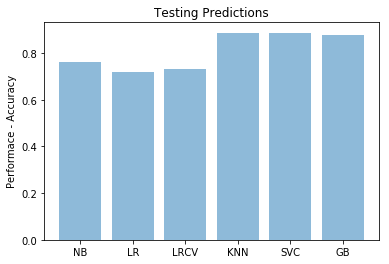

In [48]:
objects = ('NB', 'LR', 'LRCV', 'KNN', 'SVC', 'GB')
y_pos = np.arange(len(objects))
nb = metrics.accuracy_score(y_test, nb_predict_test)
lr = metrics.accuracy_score(y_test, lr_predict_test)
lr_cv = metrics.accuracy_score(y_test, lr_cv_predict_test)
knn = metrics.accuracy_score(y_test, knn_predict_test)
svc = metrics.accuracy_score(y_test, svc_predict_test)
gb = metrics.accuracy_score(y_test, gb_predict_test)

performance_test = [nb,lr,lr_cv,knn,svc,gb]
 
plt.bar(y_pos, performance_test, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Performace - Accuracy')
plt.title('Testing Predictions')
 
plt.show()

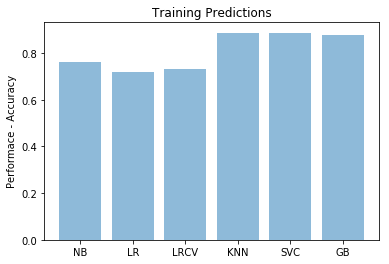

In [51]:
objects = ('NB', 'LR', 'LRCV', 'KNN', 'SVC', 'GB')
y_pos = np.arange(len(objects))
nb = metrics.accuracy_score(y_train, nb_predict_train)
lr = metrics.accuracy_score(y_train, lr_predict_train)
lr_cv = metrics.accuracy_score(y_train, lr_cv_predict_train)
knn = metrics.accuracy_score(y_train, knn_predict_train)
svc = metrics.accuracy_score(y_train, svc_predict_train)
gb = metrics.accuracy_score(y_train, gb_predict_train)

performance_train = [nb,lr,lr_cv,knn,svc,gb]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Performace - Accuracy')
plt.title('Training Predictions')
 
plt.show()